In [15]:
import requests
import json
import pandas as pd
import time
import matplotlib.pyplot as plt


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '8ac5bd4f29854a4abb37648a5b7833d8'
client_secret = 'c9f1281a0f774d97ae7d002139e53049'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
df = pd.read_csv('../data/spotify_dataset.csv', usecols=range(4), lineterminator='\n', header=0)

In [6]:
df.columns = [x.replace('"', '').lstrip() for x in df.columns]

In [7]:
artists = df['artistname'].unique()[:1000]

In [22]:
%%time
artist_dict = {}
for artist in artists:
    result = sp.search(artist, type='artist')['artists']['items']
    if len(result) > 0:
        artist_dict[artist] = result[0]['genres']


CPU times: user 4.46 s, sys: 685 ms, total: 5.15 s
Wall time: 2min 38s


In [23]:
artists = df['artistname'].unique()[:500]

In [24]:
%%time
artist_dict = {}
for artist in artists:
    result = sp.search(artist, type='artist')['artists']['items']
    if len(result) > 0:
        artist_dict[artist] = result[0]['genres']

CPU times: user 2.28 s, sys: 345 ms, total: 2.62 s
Wall time: 1min 9s


In [13]:
intervals = [10, 100, 250, 500, 1000]
times = []

for i in intervals:
    artists = df['artistname'].unique()[:i]
    start = time.time()
    artist_dict = {}
    for artist in artists:
        result = sp.search(artist, type='artist')['artists']['items']
        if len(result) > 0:
            artist_dict[artist] = result[0]['genres']
    end = time.time()
    times.append(end - start)

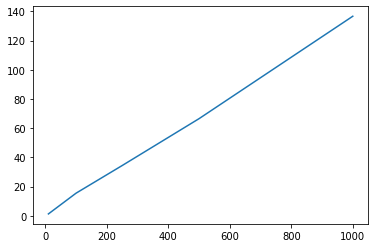

In [16]:
plt.plot(intervals, times)

In [19]:
df.tail()

,user_id,artistname,trackname,playlistname
12901974,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12901975,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12901976,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12901977,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone
12901978,2302bf9c64dc63d88a750215ed187f2c,Skid Row,Youth Gone Wild,iPhone


In [7]:
sp.user('c8ztbhj7n5pt845269o943od1')

{'display_name': 'Ajay',
 'external_urls': {'spotify': 'https://open.spotify.com/user/c8ztbhj7n5pt845269o943od1'},
 'followers': {'href': None, 'total': 1},
 'href': 'https://api.spotify.com/v1/users/c8ztbhj7n5pt845269o943od1',
 'id': 'c8ztbhj7n5pt845269o943od1',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab6775700000ee8584f1e4c23f3a5053957adec3',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:c8ztbhj7n5pt845269o943od1'}

In [17]:
oth_dict = [
            {
                "pos": 0,
                "artist_name": "Degiheugi",
                "track_uri": "spotify:track:7vqa3sDmtEaVJ2gcvxtRID",
                "artist_uri": "spotify:artist:3V2paBXEoZIAhfZRJmo2jL",
                "track_name": "Finalement",
                "album_uri": "spotify:album:2KrRMJ9z7Xjoz1Az4O6UML",
                "duration_ms": 166264,
                "album_name": "Dancing Chords and Fireflies"
            },
            {
                "pos": 1,
                "artist_name": "Degiheugi",
                "track_uri": "spotify:track:23EOmJivOZ88WJPUbIPjh6",
                "artist_uri": "spotify:artist:3V2paBXEoZIAhfZRJmo2jL",
                "track_name": "Betty",
                "album_uri": "spotify:album:3lUSlvjUoHNA8IkNTqURqd",
                "duration_ms": 235534,
                "album_name": "Endless Smile"
            },
    {
                "pos": 2,
                "artist_name": "Degiheugi",
                "track_uri": "spotify:track:1vaffTCJxkyqeJY7zF9a55",
                "artist_uri": "spotify:artist:3V2paBXEoZIAhfZRJmo2jL",
                "track_name": "Some Beat in My Head",
                "album_uri": "spotify:album:2KrRMJ9z7Xjoz1Az4O6UML",
                "duration_ms": 268050,
                "album_name": "Dancing Chords and Fireflies"
            },
            {
                "pos": 11,
                "artist_name": "Mo' Horizons",
                "track_uri": "spotify:track:7iwx00eBzeSSSy6xfESyWN",
                "artist_uri": "spotify:artist:3tuX54dqgS8LsGUvNzgrpP",
                "track_name": "Fever 99\u00b0",
                "album_uri": "spotify:album:2Fg1t2tyOSGWkVYHlFfXVf",
                "duration_ms": 364320,
                "album_name": "Come Touch The Sun"
            }
        ]

    

In [32]:
results = []
start = time.time()
for i in oth_dict:
    result.append(sp.artist(i['artist_uri'])['genres'])
end = time.time()
print(end - start)

0.3728458881378174


In [31]:
# slow code
artists = df['artistname'].unique()[:4]
start = time.time()
artist_dict = {}
for artist in artists:
    result = sp.search(artist, type='artist')['artists']['items']
    if len(result) > 0:
        artist_dict[artist] = result[0]['genres']
end = time.time()
print(end - start)


0.5056419372558594
